In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.datasets import load_iris 

In [63]:
df = pd.read_csv("DataSet/horse.csv")

#y = df["outcome"]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 6 to 297
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                52 non-null     object 
 1   age                    52 non-null     object 
 2   hospital_number        52 non-null     int64  
 3   rectal_temp            52 non-null     float64
 4   pulse                  52 non-null     float64
 5   respiratory_rate       52 non-null     float64
 6   temp_of_extremities    52 non-null     object 
 7   peripheral_pulse       52 non-null     object 
 8   mucous_membrane        52 non-null     object 
 9   capillary_refill_time  52 non-null     object 
 10  pain                   52 non-null     object 
 11  peristalsis            52 non-null     object 
 12  abdominal_distention   52 non-null     object 
 13  nasogastric_tube       52 non-null     object 
 14  nasogastric_reflux     52 non-null     object 
 15  nasogas

<ipython-input-62-5ae12c6b460e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nasogastric_reflux_ph"]=df["nasogastric_reflux_ph"].fillna(value=df["nasogastric_reflux_ph"].mean())
<ipython-input-62-5ae12c6b460e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["abdomo_protein"]=df["abdomo_protein"].fillna(value=df["abdomo_protein"].mean())
<ipython-input-62-5ae12c6b460e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

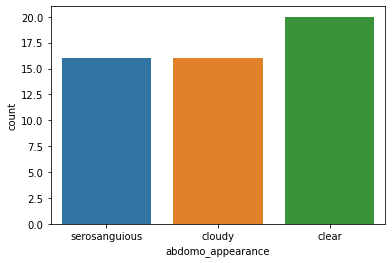

In [62]:
df["nasogastric_reflux_ph"]=df["nasogastric_reflux_ph"].fillna(value=df["nasogastric_reflux_ph"].mean())
df["abdomo_protein"]=df["abdomo_protein"].fillna(value=df["abdomo_protein"].mean())
df["abdomo_appearance"]=df["abdomo_appearance"].fillna(method= "pad")
#df=df.dropna()
y = df["outcome"]
sns.countplot(x= "abdomo_appearance", data = df)




In [60]:
y.unique()
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph      0
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance          1
abdomo_protein             0
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [21]:
df= df.drop(["outcome"],axis=1)
columns = df.columns

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [6]:
#Categorical variable names are passed to a  another variable
categorical_variable = ["surgery","age","temp_of_extremities","peripheral_pulse",
                        "mucous_membrane","capillary_refill_time","pain",
                       "peristalsis","abdominal_distention","nasogastric_tube","nasogastric_reflux","rectal_exam_feces",
                       "abdomen","abdomo_appearance","surgical_lesion","cp_data"]

for category in categorical_variable:
    df[category] = pd.get_dummies(df[category])

In [51]:
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,3.039604,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.000000,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,3.039604,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.300000,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,3.039604,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,3.039604,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.300000,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,3.039604,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.400000,lived,yes,2208,0,0,yes


In [18]:

X = df
label_encoder = LabelEncoder()
label_encoder.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape


(4, 27)

In [9]:

#imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.fit_transform(X_test)




In [10]:
model = DecisionTreeClassifier()

In [11]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
y_predict = model.predict(X_train)
Training_accuracy_score = accuracy_score(y_predict,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [4, 2]

In [72]:
iris = load_iris()
Xi = iris.data
Xi.to_frame()
yi= iris.target
#sns.countplot(x= "target",data=iris)
#Xi_train



AttributeError: 'numpy.ndarray' object has no attribute 'to_frame'